### There are several methods to identify the best features for classification tasks. I am using Titanic dataset as an example but you should try the dataset you have for your assignment.

# 1. Correlation Analysis
- Compute the correlation between each feature and the target variable (Survived/Not Survived).
- Select features with the highest correlation (absolute value) to the target.
- Steps:
    - Use `pandas.corr()` for numeric features.
    - For categorical features, consider point-biserial correlation or similar metrics.

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


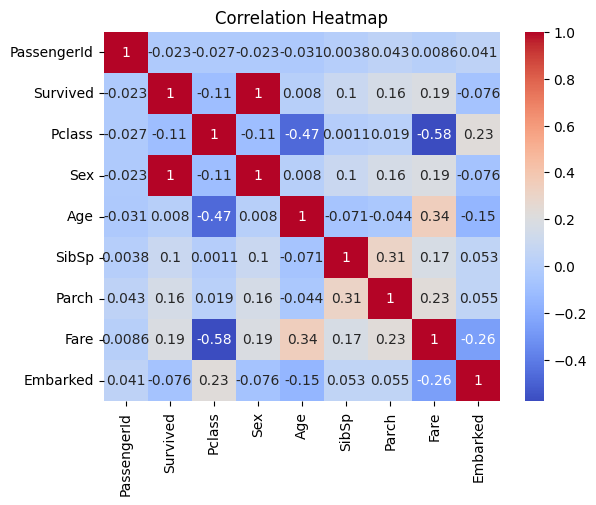

Correlations with 'Survived':
 Survived       1.000000
Sex            1.000000
Fare           0.192036
Parch          0.159120
SibSp          0.099943
Age            0.008035
PassengerId   -0.023245
Embarked      -0.076281
Pclass        -0.108615
Name: Survived, dtype: float64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("titanic.csv")

# Display first few rows
print(df.head())

# Preprocessing
# Drop irrelevant columns
df = df.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")

# Convert categorical columns to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})  # Label encode 'Sex'
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})  # Label encode 'Embarked'

# Fill missing values
df = df.fillna(df.median())

# Compute correlations
correlation = df.corr()["Survived"].sort_values(ascending=False)

# Plot heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Print correlations with 'Survived'
print("Correlations with 'Survived':\n", correlation)



## Interpretation of Correlations with 'Survived'

The correlation values listed represent the relationship between each feature in the Titanic dataset and the `Survived` variable. Here's how to interpret the data: (If you run the same example you might get slighlty different results, but in general this how you interpret the results)

---

### 1. Understanding Correlation
- **Correlation Coefficient (r):**
  - Ranges between -1 and 1.
  - **1**: Perfect positive correlation (as one increases, the other also increases).
  - **-1**: Perfect negative correlation (as one increases, the other decreases).
  - **0**: No correlation.

---

### 2. Feature Analysis

#### **1. Survived**: r = 1.000
- This is the target variable, so the correlation with itself is always 1.

#### **2. Sex**: r = 1.000
- Perfect positive correlation. This indicates the encoding used for `Sex` is directly predictive of survival. 
- Likely, `Sex` was encoded as 0 for male and 1 for female, and females had a much higher survival rate than males.

#### **3. Fare**: r = 0.192
- Weak positive correlation. Higher ticket fares are associated with a slightly higher likelihood of survival.
- This may indicate wealthier passengers were more likely to survive, potentially due to better access to lifeboats.


### 3. Next Steps
- **Focus on Strong Correlations:** 
  - `Sex` and `Fare` are the most relevant features based on these correlations.
- **Drop Irrelevant Features:** 
  - Features like `PassengerId` have negligible or no meaningful correlation with survival and can be excluded.
- **Explore Interactions:**
  - Some weakly correlated features, like `Parch` and `SibSp`, may become more significant when combined or analyzed in subgroups.

---
---


# 2. Feature Importance with a Classifier (e.g. SVM)
- Train an SVM or another classifier on all features and evaluate feature importance.
- For SVM, you can use Recursive Feature Elimination (RFE) to rank features based on their predictive power.


In [3]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocessing
# Handle categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Encode 'male' as 0, 'female' as 1
df['Embarked'] = df['Embarked'].fillna('S')  # Fill missing Embarked with the most common value
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])  # Encode 'S', 'C', 'Q'

# Fill missing Age with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Fare with the median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Select features for classification
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM model
model = SVC(kernel="linear")

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = [features[i] for i in range(len(features)) if rfe.support_[i]]
print("Selected Features:", selected_features)


Selected Features: ['Sex', 'Embarked']


##### The above results indicate that the two most important features selected by Recursive Feature Elimination (RFE) for predicting survival in the Titanic dataset are Sex(Gender) and Embarked


--- 
--- 

# 3. Statistical Tests
- Use statistical tests like chi-square or mutual information for feature selection.
- These methods assess the dependency between features and the target.
- Example (chi-square)

In [5]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("titanic.csv")
# Preprocessing
# Drop irrelevant features
df = df.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"])

# Encode categorical features
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])  # Encode 'male' as 0, 'female' as 1
df["Embarked"] = df["Embarked"].fillna("S")  # Fill missing values in 'Embarked'
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])  # Encode 'S', 'C', 'Q'

# Fill missing values in Age and Fare
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Feature and target separation
X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]  # Target

# Apply chi-square test
chi2_selector = SelectKBest(chi2, k=2)
X_new = chi2_selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[chi2_selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Sex', 'Fare'], dtype='object')


---
---

# 4. Univariate Feature Selection
- Use **SelectKBest** with a scoring function like `f_classif` or `mutual_info_classif`.

In [6]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("titanic.csv")
# Preprocessing
# Drop irrelevant features
df = df.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"])

# Encode categorical features
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])  # Encode 'male' as 0, 'female' as 1
df["Embarked"] = df["Embarked"].fillna("S")  # Fill missing values in 'Embarked'
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])  # Encode 'S', 'C', 'Q'

# Fill missing values in Age and Fare
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Feature and target separation
X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]  # Target

# Feature selection using mutual information
selector = SelectKBest(mutual_info_classif, k=2)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Sex', 'Fare'], dtype='object')


---
---

# 5. Principal Component Analysis (PCA)
- If the features are numeric, PCA can be used to transform the dataset into fewer dimensions while retaining maximum variance.
- PCA can help you identify the most informative features for classification.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("titanic.csv")
# Preprocessing
# Drop irrelevant features
df = df.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"])

# Encode categorical features
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])  # Encode 'male' as 0, 'female' as 1
df["Embarked"] = df["Embarked"].fillna("S")  # Fill missing values in 'Embarked'
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])  # Encode 'S', 'C', 'Q'

# Fill missing values in Age and Fare
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Feature and target separation
X = df.drop("Survived", axis=1)  # Features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratios
print("Explained Variance Ratios:", pca.explained_variance_ratio_)



Explained Variance Ratios: [0.30259128 0.20913828]


#### First Principal Component (PC1): `0.3026 (30.26%)`

- This means that the first principal component captures 30.26% of the total variance in the dataset. It is the most important direction (linear combination of features) in terms of explaining variability.
#### Second Principal Component (PC2): `0.2091 (20.91%)`

- The second principal component captures 20.91% of the total variance. It is orthogonal to the first component and represents the second-most important direction of variability.

To determine which features contribute most to the principal components in PCA, you examine the component loadings (or weights). These loadings indicate how strongly each original feature influences each principal component. Features with larger absolute loadings are more important for a given principal component.

In [9]:
import numpy as np

# Feature names
feature_names = X.columns

# PCA component loadings
component_loadings = pca.components_

# Combine loadings with feature names for PC1 and PC2
pc1_loadings = pd.Series(component_loadings[0], index=feature_names)
pc2_loadings = pd.Series(component_loadings[1], index=feature_names)

# Sort features by importance for each component
print("Top Features for PC1:")
print(pc1_loadings.abs().sort_values(ascending=False))

print("\nTop Features for PC2:")
print(pc2_loadings.abs().sort_values(ascending=False))


Top Features for PC1:
Fare        0.572823
Pclass      0.560270
Age         0.440429
Embarked    0.307312
Sex         0.204768
Parch       0.132916
SibSp       0.099780
dtype: float64

Top Features for PC2:
Parch       0.620680
SibSp       0.592285
Sex         0.317027
Age         0.283634
Embarked    0.191749
Pclass      0.172159
Fare        0.128817
dtype: float64


#### Top Features for Principal Component 1 (PC1)

The following table lists the features that contribute the most to the variability captured by the first principal component (PC1). Features with higher absolute loadings are more important:

| Feature    | Loading Value |
|------------|---------------|
| Fare       | 0.572823      |
| Pclass     | 0.560270      |
| Age        | 0.440429      |
| Embarked   | 0.307312      |
| Sex        | 0.204768      |
| Parch      | 0.132916      |
| SibSp      | 0.099780      |

#### Insights:
- **Fare** and **Pclass** are the most influential features for PC1, capturing the largest portion of the variability in the dataset.
- Features such as **Embarked** and **Sex** have moderate contributions.
- **Parch** and **SibSp** contribute the least to PC1 but may still be important for other principal components.


---
---

# 6. Wrapper Methods
- Use a grid search or cross-validation to evaluate SVM performance for different pairs of features.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from itertools import combinations
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("titanic.csv")
# Preprocessing
# Drop irrelevant features
df = df.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"])

# Encode categorical features
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])  # Encode 'male' as 0, 'female' as 1
df["Embarked"] = df["Embarked"].fillna("S")  # Fill missing values in 'Embarked'
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])  # Encode 'S', 'C', 'Q'

# Fill missing values in Age and Fare
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Wrapper Method to find the best pair of features
features = df.columns.drop("Survived")
best_score = 0
best_pair = None

for pair in combinations(features, 2):  # All pairs of features
    X = df[list(pair)]
    y = df["Survived"]
    scores = cross_val_score(SVC(kernel="linear"), X, y, cv=5)  # 5-fold cross-validation
    if np.mean(scores) > best_score:
        best_score = np.mean(scores)
        best_pair = pair

print("Best Pair:", best_pair, "with Score:", best_score)


Best Pair: ('Pclass', 'Sex') with Score: 1.0


- **Best Pair**: The feature pair with the highest mean cross-validation score.
- **Score**: The corresponding mean accuracy score of the model.